In [1]:
import os
from skimage import io
from skimage.util import montage
import matplotlib.pyplot as plt
import numpy as np
import json

Definindo a função para exibir uma montagem das imagens de cada classe. O resultado é uma imagem longa com a soma de todas as montagens de cada classe.

In [2]:
def display_images_by_class(base_path):
    """
    Exibe imagens organizadas por classe usando skimage.
    :param base_path: Caminho para o diretório base do dataset.
    """
    # Lista as classes (subdiretórios)
    classes = sorted(os.listdir(base_path))
    num_classes = len(classes)
    
    # Configura a figura
    plt.figure(figsize=(12, num_classes * 4))
    
    for class_index, class_name in enumerate(classes):
        class_path = os.path.join(base_path, class_name)
        if not os.path.isdir(class_path):
            continue  # Ignorar arquivos que não sejam diretórios
        
        # Lista as imagens da classe
        images = sorted(os.listdir(class_path))
        
        # Carrega as imagens e armazena em uma lista
        loaded_images = []
        for image_name in images:  # Limitar a 8 imagens por classe (ajustável)
            image_path = os.path.join(class_path, image_name)
            try:
                img = io.imread(image_path)
                loaded_images.append(img)
            except Exception as e:
                print(f"Erro ao carregar {image_path}: {e}")
        
        # Converte a lista de imagens em um array para montagem
        if loaded_images:
            images_array = np.array(loaded_images)
            montaged_images = montage(images_array, channel_axis=3)
            
            # Adiciona o montage ao plot
            plt.subplot(num_classes, 1, class_index + 1)
            plt.imshow(montaged_images)
            plt.axis('off')
            plt.title(f"Classe: {class_name} ({len(images)} imagens)")
    
    # Mostra o plot
    plt.tight_layout()
    plt.show()

In [3]:
def display_metadata(path):
    """
    Função para mostrar os metadados
    :param path: caminho para o arquivo de metadados
    """
    try:
        with open(path, 'r') as file:
            metadata = json.load(file)
        return metadata
    except FileNotFoundError:
        print(f"Erro: Arquivo nao encontrado no caminho especificado: {path}")
    except json.JSONDecodeError as e:
        print(f"Erro ao decodificar arquivo JSON: {e}")

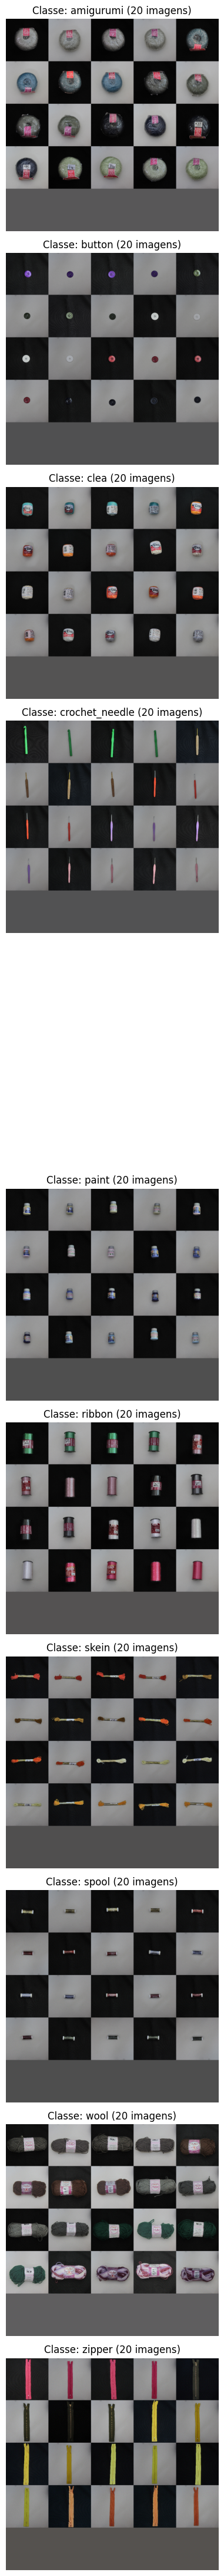

In [4]:
# Caminho para o diretório do dataset
dataset_path = "trims_dataset" # utilizando caminho relativo


# Exibe as imagens organizadas por classe
display_images_by_class(dataset_path)

Definida a função para carregar os metadados, o bloco de código abaixo carrega e exibe o arquivo de metadados do projeto.

In [9]:
metadata_path = "metadados.json"
metadata = display_metadata(metadata_path)

if metadata:
    print("Metadados carregados com sucesso!")
    print(metadata)

Metadados carregados com sucesso!
{'dataset_name': 'trims_dataset', 'description': 'Dataset criado para o trabalho de Processamento Digital de Imagens. ContÃ©m imagens de itens de aviamento com fundo preto e branco.', 'classes': [{'class_id': 1, 'class_name': 'amigurumi', 'num_items': 5, 'image_variants_per_item': ['V1-B', 'V1-W', 'V2-B', 'V2-W']}, {'class_id': 2, 'class_name': 'button', 'num_items': 5, 'image_variants_per_item': ['V1-B', 'V1-W', 'V2-B', 'V2-W']}, {'class_id': 3, 'class_name': 'clea', 'num_items': 5, 'image_variants_per_item': ['V1-B', 'V1-W', 'V2-B', 'V2-W']}, {'class_id': 4, 'class_name': 'crochet_needle', 'num_items': 5, 'image_variants_per_item': ['V1-B', 'V1-W', 'V2-B', 'V2-W']}, {'class_id': 5, 'class_name': 'paint', 'num_items': 5, 'image_variants_per_item': ['V1-B', 'V1-W', 'V2-B', 'V2-W']}, {'class_id': 6, 'class_name': 'ribbon', 'num_items': 5, 'image_variants_per_item': ['V1-B', 'V1-W', 'V2-B', 'V2-W']}, {'class_id': 7, 'class_name': 'skein', 'num_items': 5,